In [1]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import he_normal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers import Dropout

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

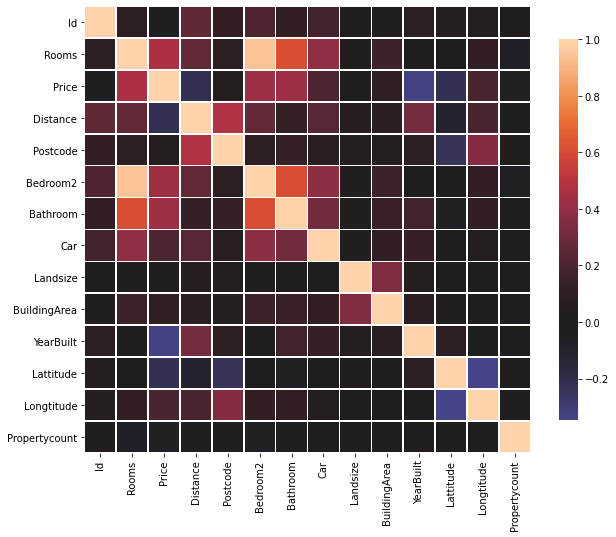

In [3]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5,  cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [4]:
df2 = df.drop(['Address','SellerG','Suburb','YearBuilt','Lattitude','Longtitude','YearBuilt','Bedroom2','Date','Method','Propertycount','Regionname','Postcode'],axis = 'columns')
df2.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,CouncilArea
0,1,2,h,NaN,2.5,1.0,1.0,126.0,NaN,Yarra City Council
1,2,2,h,1480000.0,2.5,1.0,1.0,202.0,NaN,Yarra City Council
2,3,2,h,1035000.0,2.5,1.0,0.0,156.0,79.0,Yarra City Council
3,4,3,u,NaN,2.5,2.0,1.0,0.0,NaN,Yarra City Council
4,5,3,h,1465000.0,2.5,2.0,0.0,134.0,150.0,Yarra City Council


In [5]:
df2.select_dtypes(exclude=[np.number]).columns.values

array(['Type', 'CouncilArea'], dtype=object)

In [7]:
df3 = df2.dropna(subset=['Price'])
df3.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,CouncilArea
1,2,2,h,1480000.0,2.5,1.0,1.0,202.0,NaN,Yarra City Council
2,3,2,h,1035000.0,2.5,1.0,0.0,156.0,79.0,Yarra City Council
4,5,3,h,1465000.0,2.5,2.0,0.0,134.0,150.0,Yarra City Council
5,6,3,h,850000.0,2.5,2.0,1.0,94.0,NaN,Yarra City Council
6,7,4,h,1600000.0,2.5,1.0,2.0,120.0,142.0,Yarra City Council


In [8]:
df3.columns

Index(['Id', 'Rooms', 'Type', 'Price', 'Distance', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'CouncilArea'],
      dtype='object')

In [ ]:
df3.shape

(27247, 10)

In [9]:
df4=df3.dropna(subset=['BuildingArea','Landsize'], thresh = 1)
df4.shape

(19256, 10)

In [10]:
df4.isnull().sum()

Id                 0
Rooms              0
Type               0
Price              0
Distance           0
Bathroom           9
Car              320
Landsize        1274
BuildingArea    8600
CouncilArea        0
dtype: int64

In [11]:
null_values = pd.DataFrame(df4.isnull().sum().sort_values(ascending=False)[:10])
null_values.index.name = 'Feature'
null_values.columns = ['Number of Null Values']
null_values

,Number of Null Values
Feature,
BuildingArea,8600
Landsize,1274
Car,320
Bathroom,9
CouncilArea,0
Distance,0
Price,0
Type,0
Rooms,0


In [12]:
df5 = df4.fillna(0)

In [13]:
null_values = pd.DataFrame(df5.isnull().sum().sort_values(ascending=False)[:10])
null_values.index.name = 'Feature'
null_values.columns = ['Number of Null Values']
null_values

,Number of Null Values
Feature,
CouncilArea,0
BuildingArea,0
Landsize,0
Car,0
Bathroom,0
Distance,0
Price,0
Type,0
Rooms,0


In [14]:
df5.BuildingArea.unique()

array([0.000000e+00, 7.900000e+01, 1.500000e+02, 1.420000e+02,
       2.100000e+02, 1.070000e+02, 7.500000e+01, 1.900000e+02,
       9.400000e+01, 9.700000e+01, 1.100000e+02, 1.050000e+02,
       7.300000e+01, 1.350000e+02, 2.700000e+01, 6.000000e+01,
       8.500000e+01, 1.740000e+02, 5.000000e+01, 1.280000e+02,
       1.800000e+01, 1.240000e+02, 9.100000e+01, 8.200000e+01,
       8.100000e+01, 2.250000e+02, 1.450000e+02, 8.400000e+01,
       1.340000e+02, 1.160000e+02, 8.600000e+01, 1.270000e+02,
       1.860000e+02, 9.000000e+01, 1.330000e+02, 1.300000e+02,
       1.130000e+02, 1.000000e+02, 3.090000e+02, 1.920000e+02,
       1.260000e+02, 1.010000e+02, 1.020000e+02, 7.600000e+01,
       1.460000e+02, 1.980000e+02, 1.800000e+02, 1.590000e+02,
       1.220000e+02, 1.810000e+02, 9.800000e+01, 8.300000e+01,
       1.470000e+02, 2.540000e+02, 1.230000e+02, 1.310000e+02,
       3.400000e+01, 2.070000e+02, 6.800000e+01, 5.400000e+01,
       2.630000e+02, 2.030000e+02, 1.650000e+02, 1.4000

In [15]:
df6 = df5.copy()
df6['Total'] = df6['Landsize'] + df6['BuildingArea']
df6.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Total
1,2,2,h,1480000.0,2.5,1.0,1.0,202.0,0.0,Yarra City Council,202.0
2,3,2,h,1035000.0,2.5,1.0,0.0,156.0,79.0,Yarra City Council,235.0
4,5,3,h,1465000.0,2.5,2.0,0.0,134.0,150.0,Yarra City Council,284.0
5,6,3,h,850000.0,2.5,2.0,1.0,94.0,0.0,Yarra City Council,94.0
6,7,4,h,1600000.0,2.5,1.0,2.0,120.0,142.0,Yarra City Council,262.0


In [16]:
df.Distance.unique()

array([ 2.5, 13.5,  3.3,  6.4, 13.8, 11.1,  6.3,  5.9, 11. , 12.2, 10.5,
        6.6,  9.7,  9.2, 13. , 13.9, 13.1, 10.8, 11.2, 10.7,  5.2, 11.8,
       11.7,  7.8,  9. ,  3.2, 11.4,  8.9,  8.1,  9.3, 13.6,  3.4,  1.6,
       10.3,  8.5,  7.7,  8. ,  9.4,  5.8,  3.5,  4.4, 12.1, 13.7, 14.5,
        4.6,  7.9, 15. , 12.8,  4.2,  5.6,  7.5,  6.2,  7.4,  8.7,  2.8,
        4.1,  6.9, 14.6,  8.4,  2.3,  5.5, 11.5, 14.7,  2.6,  9.9,  3.8,
        4.5,  8.8,  2.1,  1.2,  6.1, 12.6, 13.3,  6.5, 14.9,  1.9,  5.1,
        7. ,  9.1,  9.5,  1.8,  1.5,  9.8, 12.4, 10.6,  8.2, 10.9, 10.4,
       14. , 12.5,  5.3, 12.7,  3.7,  3. ,  5.7, 15.5,  4.3, 10.2, 16.5,
       23.2, 17.3, 35.2, 13.4, 25. , 16.1,  4. , 14.8, 10.1, 17.9, 17.5,
       16.7,  3.6, 43.4,  6.7, 20.6, 34.7, 23. , 24.7, 21.8, 22.2, 14.3,
       25.9,  1.3, 27. , 18. ,  7.2, 36.9, 19.6, 28.8, 24.8, 15.4, 38. ,
       45.9, 12.9,  7.3, 20.4, 32.3, 45.2, 21.3, 16. , 18.4, 12.3,  5.4,
       25.2, 16.3, 33.8, 31.7, 29.8, 20. , 17.2, 16

In [17]:
def set_distance(x):
    if x == 0:
        return 0
    elif 0 < x < 5:
        return 1
    elif 5<= x <= 25 :
        return 2
    else:
        return 3
df7 = df6.copy()
df7['Distance'] = df7['Distance'].apply(set_distance)
df7.Distance.unique()

array([1, 2, 3, 0])

In [18]:
df7.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Total
1,2,2,h,1480000.0,1,1.0,1.0,202.0,0.0,Yarra City Council,202.0
2,3,2,h,1035000.0,1,1.0,0.0,156.0,79.0,Yarra City Council,235.0
4,5,3,h,1465000.0,1,2.0,0.0,134.0,150.0,Yarra City Council,284.0
5,6,3,h,850000.0,1,2.0,1.0,94.0,0.0,Yarra City Council,94.0
6,7,4,h,1600000.0,1,1.0,2.0,120.0,142.0,Yarra City Council,262.0


In [19]:
df8 = df7.drop(['Landsize','BuildingArea'],axis = 'columns')
df8.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total
1,2,2,h,1480000.0,1,1.0,1.0,Yarra City Council,202.0
2,3,2,h,1035000.0,1,1.0,0.0,Yarra City Council,235.0
4,5,3,h,1465000.0,1,2.0,0.0,Yarra City Council,284.0
5,6,3,h,850000.0,1,2.0,1.0,Yarra City Council,94.0
6,7,4,h,1600000.0,1,1.0,2.0,Yarra City Council,262.0


In [20]:
df8[df8.Bathroom>5]

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total
616,617,8,h,2950000.0,2,7.0,4.0,Boroondara City Council,2090.0
947,948,5,h,3400000.0,2,6.0,4.0,Boroondara City Council,1241.0
1004,1005,5,h,3900000.0,2,7.0,6.0,Boroondara City Council,0.0
1860,1861,3,h,2020000.0,2,6.0,2.0,Bayside City Council,1104.0
5937,5938,6,h,6500000.0,2,6.0,3.0,Boroondara City Council,1699.0
8251,8252,4,h,760000.0,2,8.0,7.0,Darebin City Council,1534.0
11270,11271,3,h,751000.0,2,6.0,2.0,Hume City Council,695.0
17472,17473,8,h,2200000.0,2,8.0,4.0,Boroondara City Council,650.0
17531,17532,5,h,1260000.0,3,6.0,3.0,Kingston City Council,1078.0
25717,25718,10,h,2315000.0,2,9.0,2.0,Monash City Council,1078.0


Text(0, 0.5, 'Count')

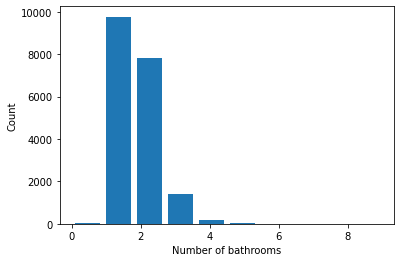

In [21]:
plt.hist(df8.Bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [22]:
df8.Bathroom.unique()

array([1., 2., 3., 4., 0., 7., 5., 6., 8., 9.])

In [23]:
df8.shape

(19256, 9)

In [24]:
df9 = df8[df8.Bathroom<5]

In [25]:
df9.Bathroom.unique()

array([1., 2., 3., 4., 0.])

Text(0, 0.5, 'Count')

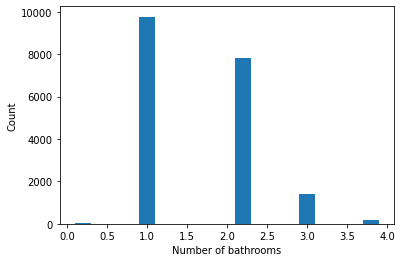

In [26]:
plt.hist(df9.Bathroom,rwidth=0.5)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [27]:
df9.shape

(19196, 9)

In [28]:
df9.Rooms.unique()

array([ 2,  3,  4,  1,  6,  5,  7,  8, 10])

Text(0, 0.5, 'Count')

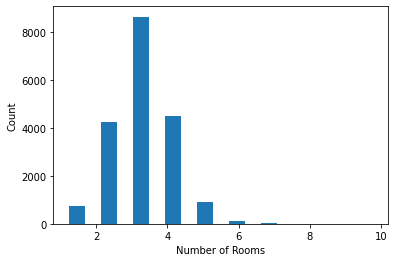

In [29]:
plt.hist(df9.Rooms,rwidth=0.5)
plt.xlabel("Number of Rooms")
plt.ylabel("Count")

In [30]:
df10 = df9[df9.Rooms<=5]

Text(0, 0.5, 'Count')

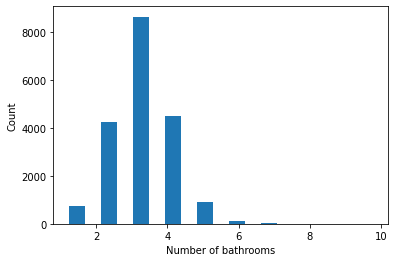

In [31]:
plt.hist(df9.Rooms,rwidth=0.5)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [32]:
df10.shape

(19070, 9)

In [33]:
df10.head(10)

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total
1,2,2,h,1480000.0,1,1.0,1.0,Yarra City Council,202.0
2,3,2,h,1035000.0,1,1.0,0.0,Yarra City Council,235.0
4,5,3,h,1465000.0,1,2.0,0.0,Yarra City Council,284.0
5,6,3,h,850000.0,1,2.0,1.0,Yarra City Council,94.0
6,7,4,h,1600000.0,1,1.0,2.0,Yarra City Council,262.0
10,11,2,h,941000.0,1,1.0,0.0,Yarra City Council,181.0
11,12,3,h,1876000.0,1,2.0,0.0,Yarra City Council,455.0
14,15,2,h,1636000.0,1,1.0,2.0,Yarra City Council,363.0
17,18,1,u,300000.0,1,1.0,1.0,Yarra City Council,0.0
18,19,2,h,1097000.0,1,1.0,2.0,Yarra City Council,295.0


In [34]:
df11 = df10.copy()
df11['price_per_sqft'] = df11['Price']/df11['Total']
df11.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total,price_per_sqft
1,2,2,h,1480000.0,1,1.0,1.0,Yarra City Council,202.0,7326.732673
2,3,2,h,1035000.0,1,1.0,0.0,Yarra City Council,235.0,4404.255319
4,5,3,h,1465000.0,1,2.0,0.0,Yarra City Council,284.0,5158.450704
5,6,3,h,850000.0,1,2.0,1.0,Yarra City Council,94.0,9042.553191
6,7,4,h,1600000.0,1,1.0,2.0,Yarra City Council,262.0,6106.870229


In [35]:
df12 = df11[df11.Total>=20]

In [36]:
df12.Total.describe()

count     18155.000000
mean        668.476233
std        3781.676133
min          20.000000
25%         273.000000
50%         559.000000
75%         747.000000
max      433014.000000
Name: Total, dtype: float64

In [37]:
df12.price_per_sqft.describe()

count     18155.000000
mean       3089.355418
std        3124.053240
min           6.235364
25%        1247.417256
50%        2110.047847
75%        3869.741958
max      120333.333333
Name: price_per_sqft, dtype: float64

In [38]:
df12.shape

(18155, 10)

In [39]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('CouncilArea'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df13 = remove_pps_outliers(df12)
df13.shape

(15599, 10)

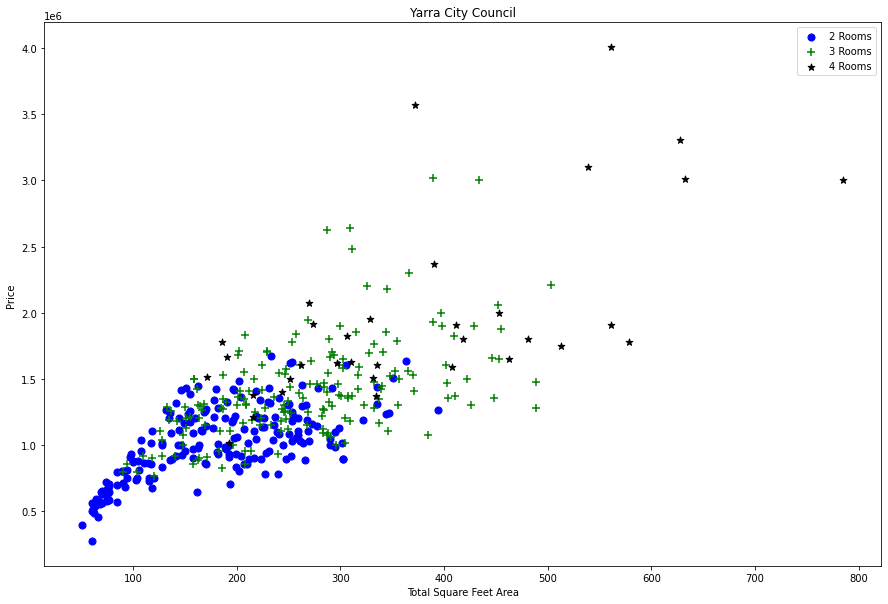

In [40]:
def plot_scatter_chart(df,CouncilArea):
    bhk2 = df[(df.CouncilArea==CouncilArea) & (df.Rooms==2)]
    bhk3 = df[(df.CouncilArea==CouncilArea) & (df.Rooms==3)]
    bhk4 = df[(df.CouncilArea==CouncilArea) & (df.Rooms==4)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Total,bhk2.Price,color='blue',label='2 Rooms', s=50)
    plt.scatter(bhk3.Total,bhk3.Price,marker='+', color='green',label='3 Rooms', s=50)
    plt.scatter(bhk4.Total,bhk4.Price,marker='*', color='black',label='4 Rooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price ")
    plt.title(CouncilArea)
    plt.legend()
    
plot_scatter_chart(df13,"Yarra City Council")

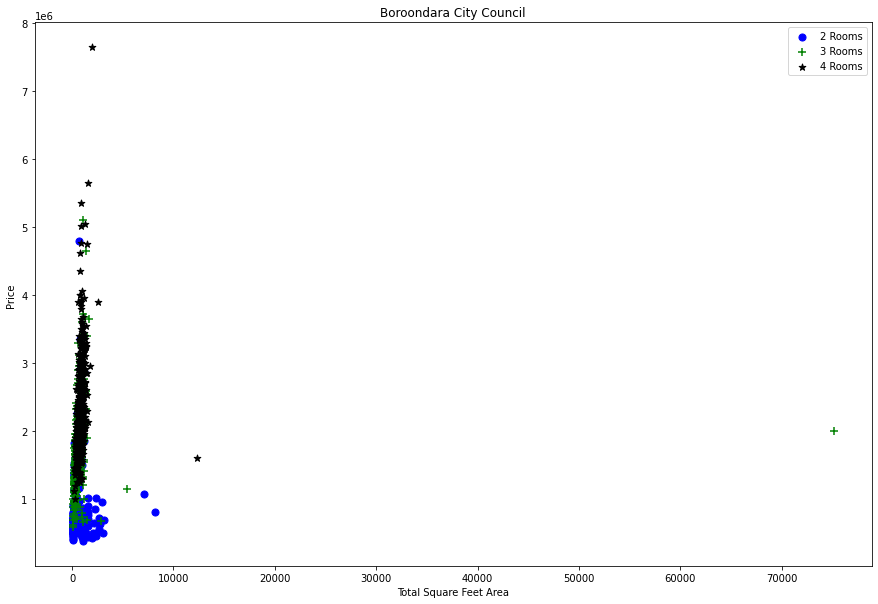

In [41]:
def plot_scatter_chart(df,CouncilArea):
    bhk2 = df[(df.CouncilArea==CouncilArea) & (df.Rooms==2)]
    bhk3 = df[(df.CouncilArea==CouncilArea) & (df.Rooms==3)]
    bhk4 = df[(df.CouncilArea==CouncilArea) & (df.Rooms==4)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Total,bhk2.Price,color='blue',label='2 Rooms', s=50)
    plt.scatter(bhk3.Total,bhk3.Price,marker='+', color='green',label='3 Rooms', s=50)
    plt.scatter(bhk4.Total,bhk4.Price,marker='*', color='black',label='4 Rooms', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price ")
    plt.title(CouncilArea)
    plt.legend()
    
plot_scatter_chart(df13,"Boroondara City Council")

In [42]:
df13.head(10)

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total,price_per_sqft
0,3719,5,h,1901000.0,2,2.0,2.0,Banyule City Council,1188.0,1600.168350
1,3721,4,h,1650000.0,2,3.0,2.0,Banyule City Council,1051.0,1569.933397
2,3726,3,h,1816000.0,2,1.0,2.0,Banyule City Council,1026.0,1769.980507
3,3727,2,u,525000.0,2,1.0,1.0,Banyule City Council,149.0,3523.489933
4,3728,4,h,2050000.0,2,3.0,2.0,Banyule City Council,1013.0,2023.692004
5,3729,5,h,1930000.0,2,2.0,1.0,Banyule City Council,1175.0,1642.553191
6,3730,2,h,2850000.0,2,1.0,1.0,Banyule City Council,1777.0,1603.826674
7,3731,4,h,2600000.0,2,2.0,3.0,Banyule City Council,1193.0,2179.379715
8,3733,2,u,600000.0,2,1.0,1.0,Banyule City Council,207.0,2898.550725
9,3735,3,h,1601000.0,2,1.0,1.0,Banyule City Council,1008.0,1588.293651


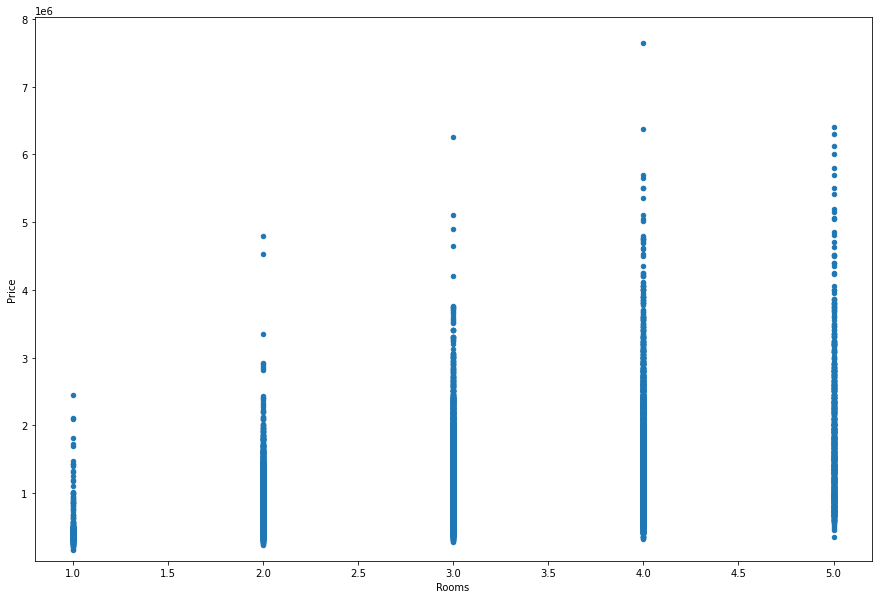

In [43]:
var ='Rooms'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

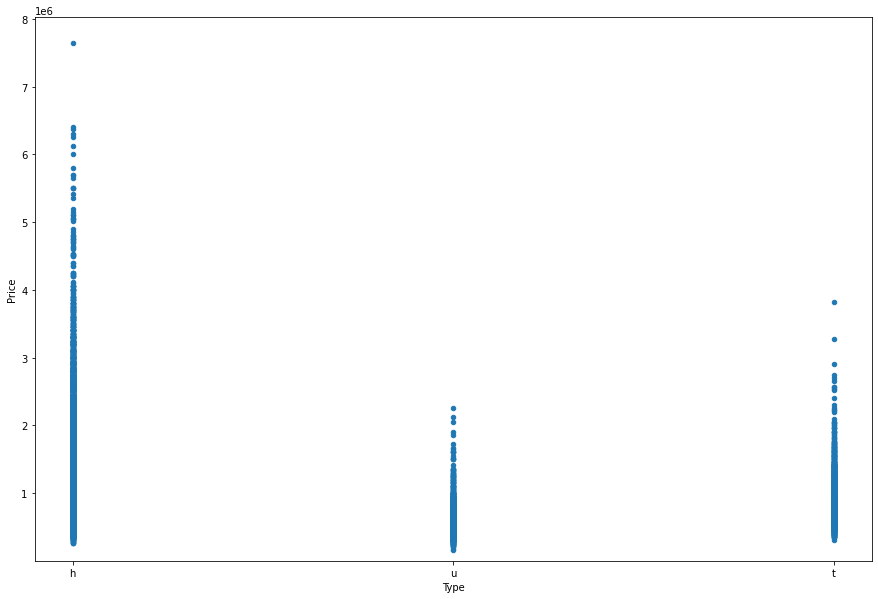

In [44]:
var ='Type'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

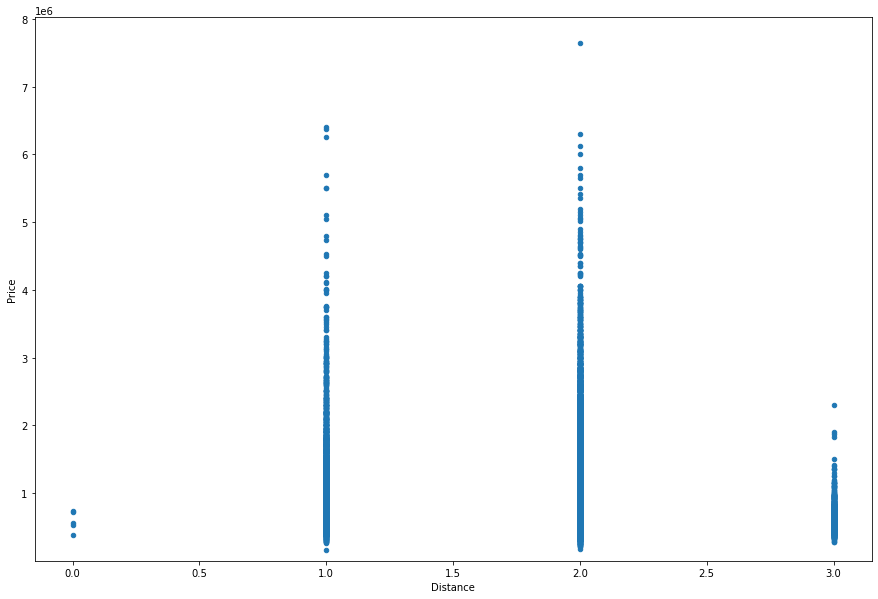

In [45]:
var ='Distance'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

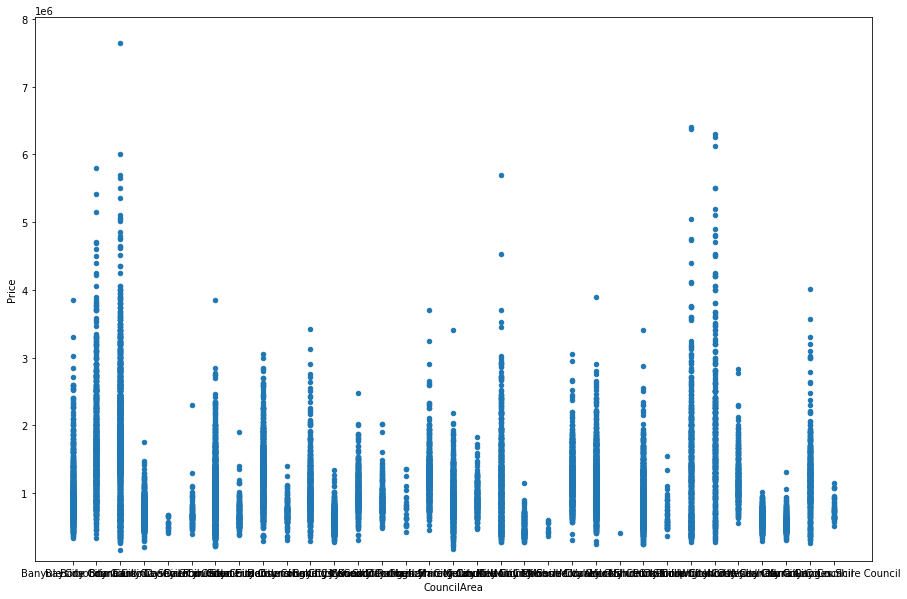

In [46]:
var ='CouncilArea'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

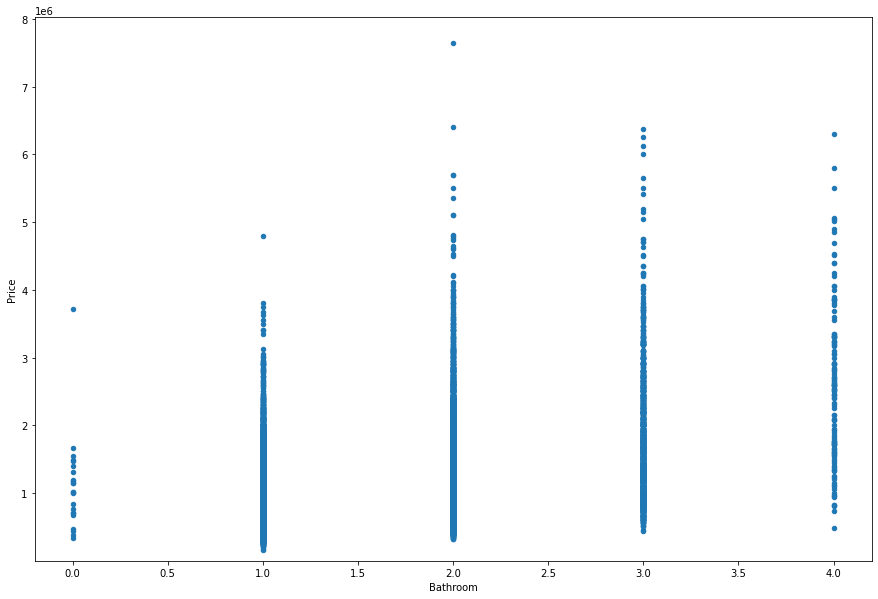

In [47]:
var ='Bathroom'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

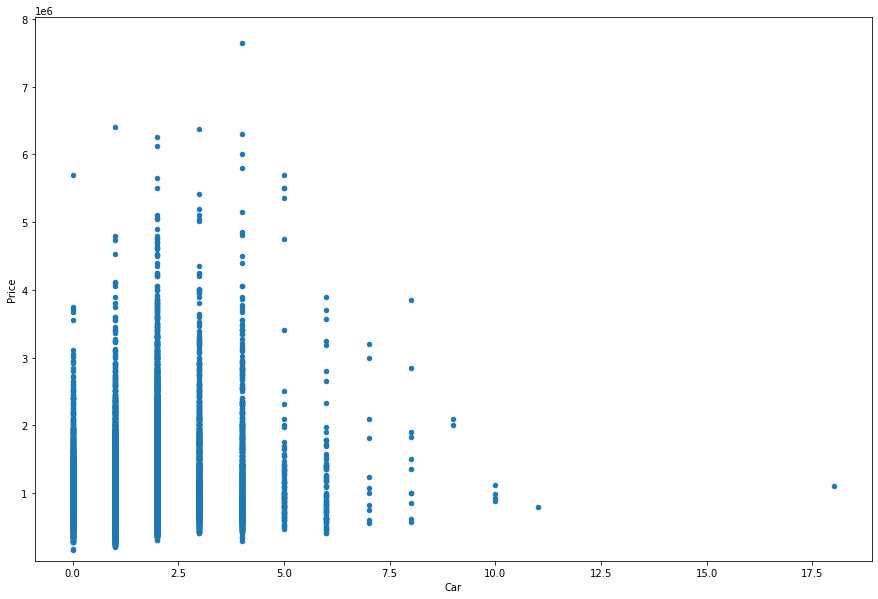

In [48]:
var ='Car'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

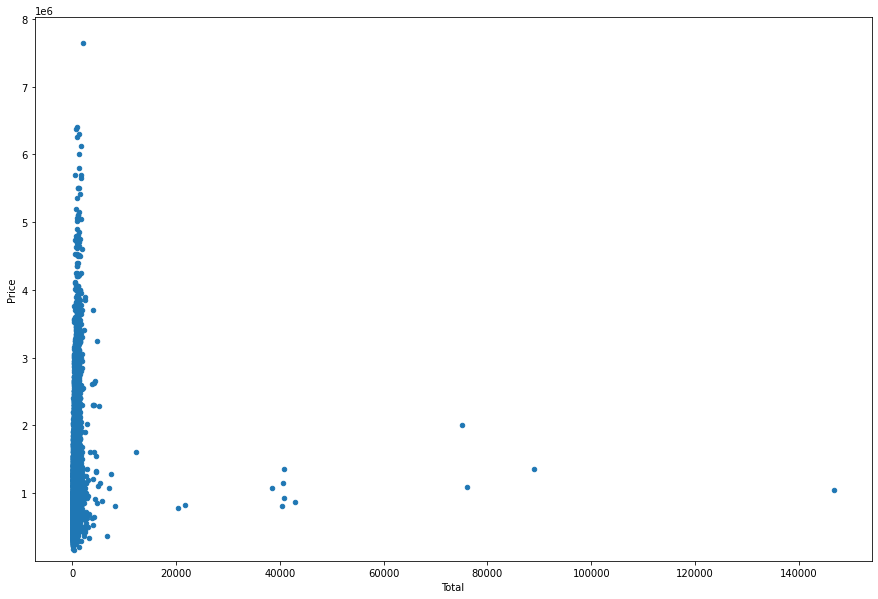

In [49]:
var ='Total'
data = pd.concat([df13['Price'],df13[var]],axis=1)
data.plot.scatter(x=var, y='Price', ylim =0.800000);
plt.show()

In [50]:
df14=df13.drop(['Type'],axis = 'columns')

In [51]:
df14.head(10)

,Id,Rooms,Price,Distance,Bathroom,Car,CouncilArea,Total,price_per_sqft
0,3719,5,1901000.0,2,2.0,2.0,Banyule City Council,1188.0,1600.168350
1,3721,4,1650000.0,2,3.0,2.0,Banyule City Council,1051.0,1569.933397
2,3726,3,1816000.0,2,1.0,2.0,Banyule City Council,1026.0,1769.980507
3,3727,2,525000.0,2,1.0,1.0,Banyule City Council,149.0,3523.489933
4,3728,4,2050000.0,2,3.0,2.0,Banyule City Council,1013.0,2023.692004
5,3729,5,1930000.0,2,2.0,1.0,Banyule City Council,1175.0,1642.553191
6,3730,2,2850000.0,2,1.0,1.0,Banyule City Council,1777.0,1603.826674
7,3731,4,2600000.0,2,2.0,3.0,Banyule City Council,1193.0,2179.379715
8,3733,2,600000.0,2,1.0,1.0,Banyule City Council,207.0,2898.550725
9,3735,3,1601000.0,2,1.0,1.0,Banyule City Council,1008.0,1588.293651


In [52]:
df15 = df14.drop(['price_per_sqft'],axis = 'columns')
df15.head(10)

,Id,Rooms,Price,Distance,Bathroom,Car,CouncilArea,Total
0,3719,5,1901000.0,2,2.0,2.0,Banyule City Council,1188.0
1,3721,4,1650000.0,2,3.0,2.0,Banyule City Council,1051.0
2,3726,3,1816000.0,2,1.0,2.0,Banyule City Council,1026.0
3,3727,2,525000.0,2,1.0,1.0,Banyule City Council,149.0
4,3728,4,2050000.0,2,3.0,2.0,Banyule City Council,1013.0
5,3729,5,1930000.0,2,2.0,1.0,Banyule City Council,1175.0
6,3730,2,2850000.0,2,1.0,1.0,Banyule City Council,1777.0
7,3731,4,2600000.0,2,2.0,3.0,Banyule City Council,1193.0
8,3733,2,600000.0,2,1.0,1.0,Banyule City Council,207.0
9,3735,3,1601000.0,2,1.0,1.0,Banyule City Council,1008.0


In [53]:
dummies = pd.get_dummies(df15.CouncilArea)
dummies.head(3)

,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
df16 = pd.concat([df15,dummies],axis='columns')
df16.head()

,Id,Rooms,Price,Distance,Bathroom,Car,CouncilArea,Total,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
0,3719,5,1901000.0,2,2.0,2.0,Banyule City Council,1188.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3721,4,1650000.0,2,3.0,2.0,Banyule City Council,1051.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3726,3,1816000.0,2,1.0,2.0,Banyule City Council,1026.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3727,2,525000.0,2,1.0,1.0,Banyule City Council,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3728,4,2050000.0,2,3.0,2.0,Banyule City Council,1013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
df17 = df16.drop('CouncilArea',axis='columns')
df17.head(10)

,Id,Rooms,Price,Distance,Bathroom,Car,Total,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
0,3719,5,1901000.0,2,2.0,2.0,1188.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3721,4,1650000.0,2,3.0,2.0,1051.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3726,3,1816000.0,2,1.0,2.0,1026.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3727,2,525000.0,2,1.0,1.0,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3728,4,2050000.0,2,3.0,2.0,1013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3729,5,1930000.0,2,2.0,1.0,1175.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,3730,2,2850000.0,2,1.0,1.0,1777.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3731,4,2600000.0,2,2.0,3.0,1193.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,3733,2,600000.0,2,1.0,1.0,207.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,3735,3,1601000.0,2,1.0,1.0,1008.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
df17.shape

(15599, 40)

In [57]:
X = df17.drop(['Price'],axis='columns')
X.head(3)

,Id,Rooms,Distance,Bathroom,Car,Total,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
0,3719,5,2,2.0,2.0,1188.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3721,4,2,3.0,2.0,1051.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3726,3,2,1.0,2.0,1026.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
X.shape


(15599, 39)

In [59]:
y = df17.Price
y.head(3)

0    1901000.0
1    1650000.0
2    1816000.0
Name: Price, dtype: float64

In [60]:
len(y)

15599

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [62]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5490795131858325

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.5384562 , 0.52136752, 0.54464501, 0.55338933, 0.54786206])

In [64]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.541144,{'normalize': False}
1,lasso,0.541132,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.458182,"{'criterion': 'mse', 'splitter': 'random'}"


In [65]:
def predict_price(location,sqft,bath,bhk,param1,param2):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = param1
    x[4] = param2
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [66]:

predict_price('Yarra City Council',2,1,1,0,235)

9413528.748647809

In [67]:
predict_price('Moonee Valley City Council',3,3,2,1,262)

10754463.643942485

In [68]:
df13.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total,price_per_sqft
0,3719,5,h,1901000.0,2,2.0,2.0,Banyule City Council,1188.0,1600.168350
1,3721,4,h,1650000.0,2,3.0,2.0,Banyule City Council,1051.0,1569.933397
2,3726,3,h,1816000.0,2,1.0,2.0,Banyule City Council,1026.0,1769.980507
3,3727,2,u,525000.0,2,1.0,1.0,Banyule City Council,149.0,3523.489933
4,3728,4,h,2050000.0,2,3.0,2.0,Banyule City Council,1013.0,2023.692004


In [69]:
f1 = df13.drop(['price_per_sqft'],axis='columns')
f1.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total
0,3719,5,h,1901000.0,2,2.0,2.0,Banyule City Council,1188.0
1,3721,4,h,1650000.0,2,3.0,2.0,Banyule City Council,1051.0
2,3726,3,h,1816000.0,2,1.0,2.0,Banyule City Council,1026.0
3,3727,2,u,525000.0,2,1.0,1.0,Banyule City Council,149.0
4,3728,4,h,2050000.0,2,3.0,2.0,Banyule City Council,1013.0


In [70]:
dummies = pd.get_dummies(f1.CouncilArea)
dummies.head()

,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
dummies2 = pd.get_dummies(f1.Type)
dummies2.head()

,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0


In [72]:
f2 = pd.concat([f1,dummies,dummies2],axis='columns')
f2.head()

,Id,Rooms,Type,Price,Distance,Bathroom,Car,CouncilArea,Total,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,h,t,u
0,3719,5,h,1901000.0,2,2.0,2.0,Banyule City Council,1188.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3721,4,h,1650000.0,2,3.0,2.0,Banyule City Council,1051.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3726,3,h,1816000.0,2,1.0,2.0,Banyule City Council,1026.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3727,2,u,525000.0,2,1.0,1.0,Banyule City Council,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3728,4,h,2050000.0,2,3.0,2.0,Banyule City Council,1013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [73]:
temp = f2.drop(['Type','CouncilArea'],axis = 'columns')
f3 = f2.drop(['Id','Type','CouncilArea'],axis = 'columns')
f3.head()

,Rooms,Price,Distance,Bathroom,Car,Total,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,h,t,u
0,5,1901000.0,2,2.0,2.0,1188.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4,1650000.0,2,3.0,2.0,1051.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1816000.0,2,1.0,2.0,1026.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,525000.0,2,1.0,1.0,149.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,2050000.0,2,3.0,2.0,1013.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [74]:
X = f3.drop(['Price'],axis='columns')
X.head(3)

,Rooms,Distance,Bathroom,Car,Total,Banyule City Council,Bayside City Council,Boroondara City Council,Brimbank City Council,Cardinia Shire Council,Casey City Council,Darebin City Council,Frankston City Council,Glen Eira City Council,Greater Dandenong City Council,Hobsons Bay City Council,Hume City Council,Kingston City Council,Knox City Council,Macedon Ranges Shire Council,Manningham City Council,Maribyrnong City Council,Maroondah City Council,Melbourne City Council,Melton City Council,Mitchell Shire Council,Monash City Council,Moonee Valley City Council,Moorabool Shire Council,Moreland City Council,Nillumbik Shire Council,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,h,t,u
0,5,2,2.0,2.0,1188.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,4,2,3.0,2.0,1051.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,2,1.0,2.0,1026.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [75]:
y = f3.Price
y.head(3)


0    1901000.0
1    1650000.0
2    1816000.0
Name: Price, dtype: float64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [77]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6117386364935783

In [78]:
from sklearn import linear_model
from sklearn import ensemble
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [79]:
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)

R^2 is: 
 0.6117386364935783


In [80]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 148740164575.36792


Text(0.5, 1.0, 'LinearRegression Model')

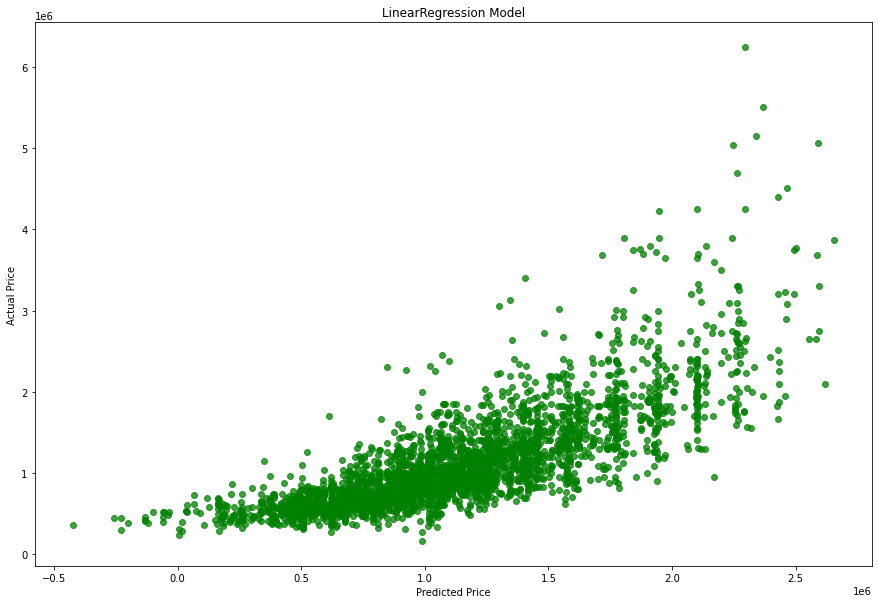

In [81]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='g') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('LinearRegression Model')

In [82]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.59799434, 0.59161156, 0.59480049, 0.61455908, 0.60412995])

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }}}
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.600619,{'normalize': False}
1,lasso,0.600605,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.455456,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [84]:
def predict_price(location,sqft,bath,bhk,param1,param2,typ):    
    loc_index = np.where(X.columns==location)[0][0]
    tmp = np.where(X.columns==typ)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    x[3] = param1
    x[4] = param2
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [85]:
predict_price('Yarra City Council',2,1,1,0,235,'h')

848793.0026083635

In [86]:
 predict_price('Port Phillip City Council',4,1,2,1,328,'h')

1707680.180088435

In [88]:
import pickle
with open('Melbourne.pickle','wb') as f:
  pickle.dump(lr_clf,f)

In [89]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime
start = datetime.now()


# initialize Our first XGBoost model...
regr = xgb.XGBRegressor(silent=False, random_state=15)
#regr = MultiOutputRegressor(regr1)
# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.001,0.01,0.1],'n_estimators':[100,300,500,700],'max_depth':[1,2,3]} 

# Perform cross validation 
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv = 5,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))   
    
print("\nTime Taken: ",start - datetime.now())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.9min finished


[22:23:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -116755294506.251175 using {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
-1439293602173.006348 1(21512005522.638775) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100}
-1077216432625.045654 1(18062808654.326508) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 300}
-831743655619.515015 1(15098811459.258812) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 500}
-664881061102.558960 1(12708673483.625711) with: {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 700}
-1430183253298.640137 1(20365524587.167244) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}
-1053943144151.555908 1(14965281930.679556) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 300}
-799840083407.851440 1(11889529683.766907) with: {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 500}
-626825409

In [ ]:
xgb1 = xgb.XGBRegressor(max_depth=3,learning_rate = 0.1,n_estimators=300,nthread=-1)
xgb1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_testf2=clf.predict(X_test)


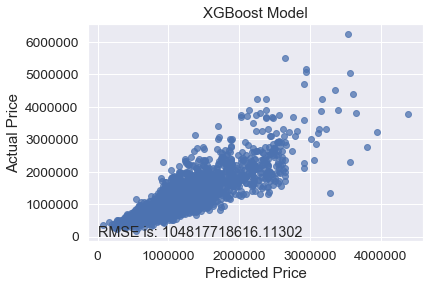

In [ ]:
from sklearn.metrics import mean_squared_error
%matplotlib inline
actual_values = y_test
plt.scatter(y_pred_testf2, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('XGBoost Model')
overlay = 'RMSE is: {}'.format(
                    
                    mean_squared_error(y_test, y_pred_testf2))
plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
plt.show()

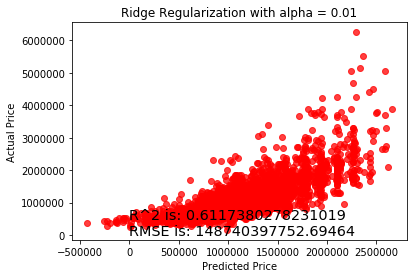

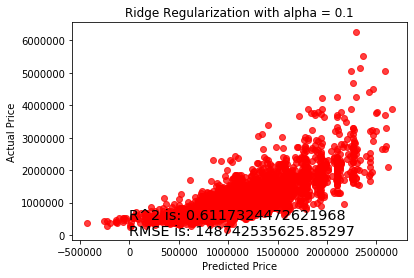

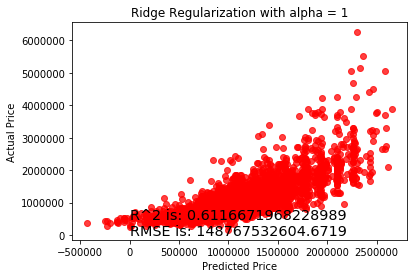

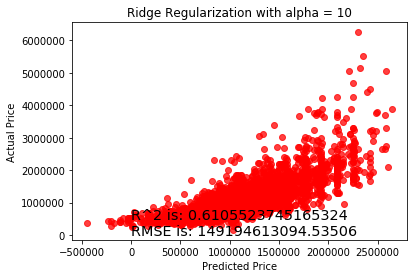

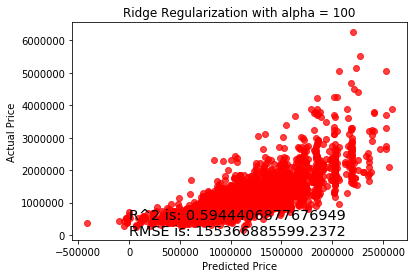

In [ ]:
from sklearn import linear_model
%matplotlib inline
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    actual_values = y_test
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='r')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [ ]:
temp.head(10)

,Id,Rooms,Price,Distance,Bathroom,Car,Total,Banyule City Council,Bayside City Council,Boroondara City Council,...,Port Phillip City Council,Stonnington City Council,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,h,t,u
0,3719,5,1901000.0,2,2.0,2.0,1188.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3721,4,1650000.0,2,3.0,2.0,1051.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3726,3,1816000.0,2,1.0,2.0,1026.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3727,2,525000.0,2,1.0,1.0,149.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3728,4,2050000.0,2,3.0,2.0,1013.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,3729,5,1930000.0,2,2.0,1.0,1175.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,3730,2,2850000.0,2,1.0,1.0,1777.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,3731,4,2600000.0,2,2.0,3.0,1193.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,3733,2,600000.0,2,1.0,1.0,207.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9,3735,3,1601000.0,2,1.0,1.0,1008.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# MODEL 1 ANN 2 LAYERS

In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_sco
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.callbacks import ModelCheckpoint

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)


In [ ]:
data = data[data.columns.difference(['Id'])]


In [ ]:
ids = test["Id"]


In [ ]:
data.shape

(5499, 42)

In [ ]:
data.head(5)

,Banyule City Council,Bathroom,Bayside City Council,Boroondara City Council,Brimbank City Council,Car,Cardinia Shire Council,Casey City Council,Darebin City Council,Distance,...,Stonnington City Council,Total,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,h,t,u
0,1,2,0,0,0,2,0,0,0,2,...,0,1188.0,0,0,0,0,0,1,0,0
1,1,3,0,0,0,2,0,0,0,2,...,0,1051.0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,2,0,0,0,2,...,0,1026.0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,2,...,0,149.0,0,0,0,0,0,0,0,1
4,1,3,0,0,0,2,0,0,0,2,...,0,1013.0,0,0,0,0,0,1,0,0


In [ ]:
train = data.iloc[:4000,:] #Upto 4000 rows from first
test = data.iloc[4000:,:] # From 4000 row to last
X_train = train[train.columns.difference(['Price'])].values
y_train = train[['Price']].values
X_test = test[test.columns.difference(['Price'])].values

In [ ]:

from sklearn.preprocessing import StandardScaler, PowerTransformer
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
y_train.shape


(4000, 1)

In [ ]:
flat_y = y_train.flatten()
flat_y.shape

(4000,)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [ ]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, flat_y)
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=250)
# predict
lgbm_prediction_tr = gbm.predict(X_train, num_iteration=gbm.best_iteration)
lgbm_prediction_te = gbm.predict(X_test, num_iteration=gbm.best_iteration)

Starting training...


In [ ]:
train["lgb"] = lgbm_prediction_tr
test["lgb"] = lgbm_prediction_te

In [ ]:
train.head(2)


,Banyule City Council,Bathroom,Bayside City Council,Boroondara City Council,Brimbank City Council,Car,Cardinia Shire Council,Casey City Council,Darebin City Council,Distance,...,Total,Whitehorse City Council,Whittlesea City Council,Wyndham City Council,Yarra City Council,Yarra Ranges Shire Council,h,t,u,lgb
0,1,2,0,0,0,2,0,0,0,2,...,1188.0,0,0,0,0,0,1,0,0,0.080709
1,1,3,0,0,0,2,0,0,0,2,...,1051.0,0,0,0,0,0,1,0,0,-0.198729


In [ ]:
y_pred = sc_y.inverse_transform(lgbm_prediction_te)


In [ ]:
y_pred


array([ 589989.65963697,  648640.62391681, 1157497.23192263, ...,
        843611.26820719,  602952.48842662, 1004626.75665911])

In [ ]:
data = pd.concat([train, test],axis=0, sort='False', ignore_index = True)
data = data[data.columns.difference(['Id'])]
train = data.iloc[:4000,:]
test = data.iloc[4000:,:]
X_train = train[train.columns.difference(['Price'])].values
y_train = train[['Price']].values
X_test = test[test.columns.difference(['Price'])].values
pt_X = PowerTransformer(method='yeo-johnson', standardize=False)
sc_y = StandardScaler()
sc_X = StandardScaler()
y_train = sc_y.fit_transform(y_train)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#Inıtialising the ANN
model = model()
#Adding the input layer and first hidden layer
model.add(Dense(units =480, kernel_initializer='random_uniform', activation= 'tanh', 
                input_dim=X_train.shape[1]))
#Add the second hidden layer
model.add(Dense(units =480, kernel_initializer='random_uniform', activation= 'tanh'))
#Add the second hidden layer
model.add(Dense(units =10, kernel_initializer='random_uniform', activation= 'relu'))
#The output layer
model.add(Dense(units =1, kernel_initializer='random_uniform', activation= 'elu'))

In [ ]:
print(model.summary())


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 480)               20640     
_________________________________________________________________
dense_26 (Dense)             (None, 480)               230880    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                4810      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 256,341
Trainable params: 256,341
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999,decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=32, nb_epoch=150, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 3719 samples, validate on 281 samples
Epoch 1/150
3719/3719 [==============================] - 1s 188us/step - loss: 0.0364 - mse: 0.3983 - val_loss: 0.5189 - val_mse: 4.0928

Epoch 00001: val_loss improved from inf to 0.51890, saving model to min_vl_model.h5
Epoch 2/150
3719/3719 [==============================] - 1s 162us/step - loss: 0.0355 - mse: 0.3613 - val_loss: 0.6295 - val_mse: 5.3784

Epoch 00002: val_loss did not improve from 0.51890
Epoch 3/150
3719/3719 [==============================] - 1s 197us/step - loss: 0.0355 - mse: 0.3692 - val_loss: 0.5253 - val_mse: 4.1692

Epoch 00003: val_loss did not improve from 0.51890
Epoch 4/150
3719/3719 [==============================] - 1s 156us/step - loss: 0.0366 - mse: 0.3405 - val_loss: 0.5606 - val_mse: 4.4809

Epoch 00004: val_loss did not improve from 0.51890
Epoch 5/150
3719/3719 [==============================] - 1s 146us/step - loss: 0.0358 - mse: 0.3515 - val_loss: 0.4444 - val_mse: 3.4260

Epoch 00005: val_loss impr


Epoch 00043: val_loss did not improve from 0.44444
Epoch 44/150
3719/3719 [==============================] - 1s 135us/step - loss: 0.0342 - mse: 0.3362 - val_loss: 0.7749 - val_mse: 6.9886

Epoch 00044: val_loss did not improve from 0.44444
Epoch 45/150
3719/3719 [==============================] - 1s 135us/step - loss: 0.0339 - mse: 0.3228 - val_loss: 0.8407 - val_mse: 7.8976

Epoch 00045: val_loss did not improve from 0.44444
Epoch 46/150
3719/3719 [==============================] - 1s 135us/step - loss: 0.0337 - mse: 0.3356 - val_loss: 0.7852 - val_mse: 7.1412

Epoch 00046: val_loss did not improve from 0.44444
Epoch 47/150
3719/3719 [==============================] - 1s 135us/step - loss: 0.0344 - mse: 0.3692 - val_loss: 0.7810 - val_mse: 7.0241

Epoch 00047: val_loss did not improve from 0.44444
Epoch 48/150
3719/3719 [==============================] - 1s 144us/step - loss: 0.0342 - mse: 0.2758 - val_loss: 0.6907 - val_mse: 5.8490

Epoch 00048: val_loss did not improve from 0.4444

3719/3719 [==============================] - 1s 146us/step - loss: 0.0301 - mse: 0.2782 - val_loss: 0.9267 - val_mse: 9.2302

Epoch 00087: val_loss did not improve from 0.44444
Epoch 88/150
3719/3719 [==============================] - 0s 130us/step - loss: 0.0302 - mse: 0.2675 - val_loss: 0.8797 - val_mse: 8.5270

Epoch 00088: val_loss did not improve from 0.44444
Epoch 89/150
3719/3719 [==============================] - 0s 133us/step - loss: 0.0300 - mse: 0.2516 - val_loss: 0.9475 - val_mse: 9.6720

Epoch 00089: val_loss did not improve from 0.44444
Epoch 90/150
3719/3719 [==============================] - 1s 135us/step - loss: 0.0307 - mse: 0.2996 - val_loss: 1.0020 - val_mse: 10.5788

Epoch 00090: val_loss did not improve from 0.44444
Epoch 91/150
3719/3719 [==============================] - 1s 138us/step - loss: 0.0301 - mse: 0.2899 - val_loss: 1.0104 - val_mse: 10.8123

Epoch 00091: val_loss did not improve from 0.44444
Epoch 92/150
3719/3719 [==============================] - 1s 

3719/3719 [==============================] - 1s 150us/step - loss: 0.0266 - mse: 0.2048 - val_loss: 1.2222 - val_mse: 15.4037

Epoch 00130: val_loss did not improve from 0.44444
Epoch 131/150
3719/3719 [==============================] - 1s 161us/step - loss: 0.0264 - mse: 0.2106 - val_loss: 1.2168 - val_mse: 15.3154

Epoch 00131: val_loss did not improve from 0.44444
Epoch 132/150
3719/3719 [==============================] - 1s 145us/step - loss: 0.0262 - mse: 0.1827 - val_loss: 1.1637 - val_mse: 14.0893

Epoch 00132: val_loss did not improve from 0.44444
Epoch 133/150
3719/3719 [==============================] - 1s 144us/step - loss: 0.0262 - mse: 0.1815 - val_loss: 1.0629 - val_mse: 11.9053

Epoch 00133: val_loss did not improve from 0.44444
Epoch 134/150
3719/3719 [==============================] - 1s 160us/step - loss: 0.0258 - mse: 0.1980 - val_loss: 1.1522 - val_mse: 13.7719

Epoch 00134: val_loss did not improve from 0.44444
Epoch 135/150
3719/3719 [=============================

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred = sc_y.inverse_transform(y_pred)


In [ ]:
y_pred


array([[2908567.5],
       [3139891.2],
       [3411094.5],
       ...,
       [1281590.8],
       [1231768.9],
       [1339824. ]], dtype=float32)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids

In [ ]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission1.csv", index=False)

In [ ]:
y_pred.head()


,Id,SalePrice
0,19636.0,2908567.50
1,19638.0,3139891.25
2,19640.0,3411094.50
3,19641.0,2307300.25
4,19642.0,3184729.25


# MODEL 2 : (ANN with 3 hidden layers, ,kernel='he_normal', Dropouts=0.2, and BatchNormalisation Layers)

In [ ]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =300, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))

model.add(Dropout(0.2))

#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'elu'))

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 300)               12900     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)               

In [ ]:
#Compiling the ANN
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999,decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model3.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
model.fit(X_train,y_train, validation_split=0.07, batch_size=32, nb_epoch=200, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 3719 samples, validate on 281 samples
Epoch 1/200
3719/3719 [==============================] - 2s 471us/step - loss: 0.1018 - mse: 0.6270 - val_loss: 4.9888e-04 - val_mse: 0.0532

Epoch 00001: val_loss improved from inf to 0.00050, saving model to min_vl_model3.h5
Epoch 2/200
3719/3719 [==============================] - 0s 91us/step - loss: 0.0710 - mse: 0.4060 - val_loss: 4.9888e-04 - val_mse: 0.0509

Epoch 00002: val_loss did not improve from 0.00050
Epoch 3/200
3719/3719 [==============================] - 0s 100us/step - loss: 0.0588 - mse: 0.3595 - val_loss: 4.9888e-04 - val_mse: 0.0635

Epoch 00003: val_loss did not improve from 0.00050
Epoch 4/200
3719/3719 [==============================] - 0s 131us/step - loss: 0.0534 - mse: 0.3314 - val_loss: 4.9888e-04 - val_mse: 0.0655

Epoch 00004: val_loss did not improve from 0.00050
Epoch 5/200
3719/3719 [==============================] - 0s 121us/step - loss: 0.0527 - mse: 0.3271 - val_loss: 4.9888e-04 - val_mse: 0.0733

Epoch 

3719/3719 [==============================] - 0s 77us/step - loss: 0.0375 - mse: 0.2633 - val_loss: 0.0765 - val_mse: 0.8623

Epoch 00044: val_loss did not improve from 0.00050
Epoch 45/200
3719/3719 [==============================] - 0s 75us/step - loss: 0.0379 - mse: 0.2781 - val_loss: 0.0772 - val_mse: 0.8112

Epoch 00045: val_loss did not improve from 0.00050
Epoch 46/200
3719/3719 [==============================] - 0s 76us/step - loss: 0.0372 - mse: 0.2729 - val_loss: 0.0788 - val_mse: 0.7811

Epoch 00046: val_loss did not improve from 0.00050
Epoch 47/200
3719/3719 [==============================] - 0s 75us/step - loss: 0.0380 - mse: 0.2704 - val_loss: 0.0884 - val_mse: 0.8646

Epoch 00047: val_loss did not improve from 0.00050
Epoch 48/200
3719/3719 [==============================] - 0s 74us/step - loss: 0.0373 - mse: 0.2637 - val_loss: 0.0842 - val_mse: 0.8285

Epoch 00048: val_loss did not improve from 0.00050
Epoch 49/200
3719/3719 [==============================] - 0s 74us/st

3719/3719 [==============================] - 0s 74us/step - loss: 0.0329 - mse: 0.2322 - val_loss: 0.2016 - val_mse: 1.6792

Epoch 00130: val_loss did not improve from 0.00050
Epoch 131/200
3719/3719 [==============================] - 0s 74us/step - loss: 0.0332 - mse: 0.2347 - val_loss: 0.2550 - val_mse: 2.0825

Epoch 00131: val_loss did not improve from 0.00050
Epoch 132/200
3719/3719 [==============================] - 0s 74us/step - loss: 0.0331 - mse: 0.2341 - val_loss: 0.2367 - val_mse: 1.9269

Epoch 00132: val_loss did not improve from 0.00050
Epoch 133/200
3719/3719 [==============================] - 0s 76us/step - loss: 0.0326 - mse: 0.2357 - val_loss: 0.1900 - val_mse: 1.5628

Epoch 00133: val_loss did not improve from 0.00050
Epoch 134/200
3719/3719 [==============================] - 0s 74us/step - loss: 0.0328 - mse: 0.2327 - val_loss: 0.2033 - val_mse: 1.6626

Epoch 00134: val_loss did not improve from 0.00050
Epoch 135/200
3719/3719 [==============================] - 0s 75

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred = sc_y.inverse_transform(y_pred)


In [ ]:
y_pred

array([[ 881590.4 ],
       [ 772326.2 ],
       [ 831276.56],
       ...,
       [ 829188.2 ],
       [1085526.2 ],
       [ 917017.7 ]], dtype=float32)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids

In [ ]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission2.csv", index=False)

In [ ]:
y_pred.head()


,Id,SalePrice
0,19636.0,8.815904e+05
1,19638.0,7.723262e+05
2,19640.0,8.312766e+05
3,19641.0,1.143470e+06
4,19642.0,7.975538e+05


# MODEL 3 ANN 5 LAYERS

In [ ]:
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

#Inıtialising the ANN
model = Sequential()
#Adding the input layer and first hidden layer
model.add(Dense(units =150, kernel_initializer=he_normal(seed=None), activation= 'tanh', 
                input_dim=X_train.shape[1]))



#Add the first hidden layer
model.add(Dense(units =100, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(Dropout(0.2))

#Add the second hidden layer
model.add(Dense(units =80, kernel_initializer=he_normal(seed=None), activation= 'tanh'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#Add the third hidden layer
model.add(Dense(units =50, kernel_initializer=he_normal(seed=None), activation= 'tanh'))


#Add the fourth hidden layer
model.add(Dense(units =30, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#Add the fifth hidden layer
model.add(Dense(units =10, kernel_initializer=he_normal(seed=None), activation= 'relu'))
model.add(BatchNormalization())

#The output layer
model.add(Dense(units =1, kernel_initializer=he_normal(seed=None), activation= 'elu'))

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 150)               6450      
_________________________________________________________________
dense_35 (Dense)             (None, 100)               15100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 80)                8080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 80)                320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 50)              

In [ ]:
opt = keras.optimizers.Adam(lr=0.0015, beta_1=0.9, beta_2=0.999,decay=0.0, amsgrad=False)
model.compile(optimizer=opt, loss='mean_squared_logarithmic_error', metrics=['mse'])
#Fitting the ANN to the training set
model_filepath = 'min_vl_model4.h5'
checkpoint = ModelCheckpoint(model_filepath, monitor = 'val_loss', verbose=1, save_best_only = True, mode='min' )
history=model.fit(X_train,y_train, validation_split=0.07, batch_size=32, nb_epoch=400, callbacks=[checkpoint])
model.load_weights(model_filepath)

Train on 3719 samples, validate on 281 samples
Epoch 1/400
3719/3719 [==============================] - 1s 225us/step - loss: 0.0738 - mse: 0.4496 - val_loss: 0.0018 - val_mse: 0.2010

Epoch 00001: val_loss improved from inf to 0.00177, saving model to min_vl_model4.h5
Epoch 2/400
3719/3719 [==============================] - 0s 80us/step - loss: 0.0607 - mse: 0.3749 - val_loss: 0.0068 - val_mse: 0.4105

Epoch 00002: val_loss did not improve from 0.00177
Epoch 3/400
3719/3719 [==============================] - 0s 78us/step - loss: 0.0521 - mse: 0.3478 - val_loss: 0.0085 - val_mse: 0.4233

Epoch 00003: val_loss did not improve from 0.00177
Epoch 4/400
3719/3719 [==============================] - 0s 79us/step - loss: 0.0503 - mse: 0.3398 - val_loss: 0.0058 - val_mse: 0.3303

Epoch 00004: val_loss did not improve from 0.00177
Epoch 5/400
3719/3719 [==============================] - 0s 80us/step - loss: 0.0486 - mse: 0.3365 - val_loss: 0.0095 - val_mse: 0.3969

Epoch 00005: val_loss did not

3719/3719 [==============================] - 0s 77us/step - loss: 0.0368 - mse: 0.2955 - val_loss: 0.6437 - val_mse: 5.1867

Epoch 00044: val_loss did not improve from 0.00177
Epoch 45/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0361 - mse: 0.2892 - val_loss: 0.6661 - val_mse: 5.4573

Epoch 00045: val_loss did not improve from 0.00177
Epoch 46/400
3719/3719 [==============================] - 0s 78us/step - loss: 0.0365 - mse: 0.2870 - val_loss: 0.6030 - val_mse: 4.7288

Epoch 00046: val_loss did not improve from 0.00177
Epoch 47/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0363 - mse: 0.2857 - val_loss: 0.5611 - val_mse: 4.2746

Epoch 00047: val_loss did not improve from 0.00177
Epoch 48/400
3719/3719 [==============================] - 0s 77us/step - loss: 0.0373 - mse: 0.2989 - val_loss: 0.6390 - val_mse: 5.0910

Epoch 00048: val_loss did not improve from 0.00177
Epoch 49/400
3719/3719 [==============================] - 0s 75us/st

3719/3719 [==============================] - 0s 75us/step - loss: 0.0323 - mse: 0.2712 - val_loss: 0.7727 - val_mse: 6.7941

Epoch 00130: val_loss did not improve from 0.00177
Epoch 131/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0324 - mse: 0.2719 - val_loss: 0.8068 - val_mse: 7.2702

Epoch 00131: val_loss did not improve from 0.00177
Epoch 132/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0329 - mse: 0.2678 - val_loss: 0.8035 - val_mse: 7.2303

Epoch 00132: val_loss did not improve from 0.00177
Epoch 133/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0320 - mse: 0.2609 - val_loss: 0.7556 - val_mse: 6.5357

Epoch 00133: val_loss did not improve from 0.00177
Epoch 134/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0319 - mse: 0.2575 - val_loss: 0.7557 - val_mse: 6.5416

Epoch 00134: val_loss did not improve from 0.00177
Epoch 135/400
3719/3719 [==============================] - 0s 75

3719/3719 [==============================] - 0s 77us/step - loss: 0.0298 - mse: 0.2309 - val_loss: 0.8165 - val_mse: 7.4500

Epoch 00216: val_loss did not improve from 0.00177
Epoch 217/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0293 - mse: 0.2355 - val_loss: 0.8217 - val_mse: 7.5010

Epoch 00217: val_loss did not improve from 0.00177
Epoch 218/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0304 - mse: 0.2403 - val_loss: 0.8038 - val_mse: 7.2324

Epoch 00218: val_loss did not improve from 0.00177
Epoch 219/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0300 - mse: 0.2331 - val_loss: 0.8416 - val_mse: 7.8382

Epoch 00219: val_loss did not improve from 0.00177
Epoch 220/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0294 - mse: 0.2320 - val_loss: 0.8620 - val_mse: 8.1484

Epoch 00220: val_loss did not improve from 0.00177
Epoch 221/400
3719/3719 [==============================] - 0s 76

3719/3719 [==============================] - 0s 76us/step - loss: 0.0298 - mse: 0.2462 - val_loss: 0.8409 - val_mse: 7.7582

Epoch 00259: val_loss did not improve from 0.00177
Epoch 260/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0298 - mse: 0.2404 - val_loss: 0.8451 - val_mse: 7.8998

Epoch 00260: val_loss did not improve from 0.00177
Epoch 261/400
3719/3719 [==============================] - 0s 77us/step - loss: 0.0293 - mse: 0.2407 - val_loss: 0.7898 - val_mse: 7.0324

Epoch 00261: val_loss did not improve from 0.00177
Epoch 262/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0300 - mse: 0.2463 - val_loss: 0.8273 - val_mse: 7.6052

Epoch 00262: val_loss did not improve from 0.00177
Epoch 263/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0291 - mse: 0.2390 - val_loss: 0.8262 - val_mse: 7.5691

Epoch 00263: val_loss did not improve from 0.00177
Epoch 264/400
3719/3719 [==============================] - 0s 76

Epoch 302/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0286 - mse: 0.2333 - val_loss: 0.8378 - val_mse: 7.8728

Epoch 00302: val_loss did not improve from 0.00177
Epoch 303/400
3719/3719 [==============================] - 0s 78us/step - loss: 0.0284 - mse: 0.2384 - val_loss: 0.8565 - val_mse: 8.1333

Epoch 00303: val_loss did not improve from 0.00177
Epoch 304/400
3719/3719 [==============================] - 0s 79us/step - loss: 0.0293 - mse: 0.2328 - val_loss: 0.8510 - val_mse: 7.9845

Epoch 00304: val_loss did not improve from 0.00177
Epoch 305/400
3719/3719 [==============================] - 0s 84us/step - loss: 0.0280 - mse: 0.2299 - val_loss: 0.8695 - val_mse: 8.2549

Epoch 00305: val_loss did not improve from 0.00177
Epoch 306/400
3719/3719 [==============================] - 0s 90us/step - loss: 0.0286 - mse: 0.2328 - val_loss: 0.8439 - val_mse: 7.8596

Epoch 00306: val_loss did not improve from 0.00177
Epoch 307/400
3719/3719 [=========================

3719/3719 [==============================] - 0s 76us/step - loss: 0.0276 - mse: 0.2249 - val_loss: 0.8344 - val_mse: 7.6894

Epoch 00345: val_loss did not improve from 0.00177
Epoch 346/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0274 - mse: 0.2234 - val_loss: 0.8621 - val_mse: 8.1027

Epoch 00346: val_loss did not improve from 0.00177
Epoch 347/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0282 - mse: 0.2242 - val_loss: 0.8453 - val_mse: 7.8419

Epoch 00347: val_loss did not improve from 0.00177
Epoch 348/400
3719/3719 [==============================] - 0s 75us/step - loss: 0.0278 - mse: 0.2250 - val_loss: 0.8709 - val_mse: 8.2287

Epoch 00348: val_loss did not improve from 0.00177
Epoch 349/400
3719/3719 [==============================] - 0s 76us/step - loss: 0.0278 - mse: 0.2195 - val_loss: 0.8718 - val_mse: 8.2186

Epoch 00349: val_loss did not improve from 0.00177
Epoch 350/400
3719/3719 [==============================] - 0s 80

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
y_pred = sc_y.inverse_transform(y_pred)


In [ ]:
y_pred

array([[1213643.  ],
       [1044929.5 ],
       [1304359.  ],
       ...,
       [1025515.44],
       [1047324.25],
       [1899454.2 ]], dtype=float32)

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred["Id"] = ids

In [ ]:
y_pred = y_pred.rename(columns={0: "SalePrice"})
y_pred = y_pred[["Id","SalePrice"]]
y_pred.to_csv("Submission3.csv", index=False)

In [ ]:
y_pred.head()


,Id,SalePrice
0,19636.0,1213643.00
1,19638.0,1044929.50
2,19640.0,1304359.00
3,19641.0,1411648.00
4,19642.0,1099935.25
